### IMPORTING LIBRARIES, AND CREATING JUST ONE DATASET WITH ALL ARCHIVES

In [2]:
import pandas as pd
import pathlib

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.io as pio
import plotly.express as px

### ADJUSTING OUR BASE TO APPLY OUR MODELS

In [45]:
df = pd.read_csv('FinalDF.csv')

df.dtypes
print(df.loc[0])

Unnamed: 0                                1
host_is_superhost                         t
host_listings_count                     2.0
latitude                         -22.965919
longitude                        -43.178962
property_type                   Condominium
room_type                   Entire home/apt
accommodates                              5
bathrooms                               1.0
bedrooms                                2.0
beds                                    2.0
bed_type                                Bed
price                                 270.0
extra_people                           51.0
minimum_nights                            4
instant_bookable                          t
is_business_travel_ready                  f
cancellation_policy                  strict
ano                                    2018
mes                                       4
len_amenities                            25
Name: 0, dtype: object


#### 't' and 'f' to Booleans

In [46]:
booleans = ['t', 'f']
bool_columns =[]
for column in df:
    if df.loc[0][column] in booleans:
        df[column] = df[column].replace('t', True).replace('f',False)
print(df.loc[0])

Unnamed: 0                                1
host_is_superhost                      True
host_listings_count                     2.0
latitude                         -22.965919
longitude                        -43.178962
property_type                   Condominium
room_type                   Entire home/apt
accommodates                              5
bathrooms                               1.0
bedrooms                                2.0
beds                                    2.0
bed_type                                Bed
price                                 270.0
extra_people                           51.0
minimum_nights                            4
instant_bookable                       True
is_business_travel_ready              False
cancellation_policy                  strict
ano                                    2018
mes                                       4
len_amenities                            25
Name: 0, dtype: object


In [47]:
df.dtypes

Unnamed: 0                    int64
host_is_superhost              bool
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
price                       float64
extra_people                float64
minimum_nights                int64
instant_bookable               bool
is_business_travel_ready       bool
cancellation_policy          object
ano                           int64
mes                           int64
len_amenities                 int64
dtype: object

#### TEXT -> DUMMIES

In [48]:
text_columns = []
for column in df:
    if df[column].dtype == 'object':
        text_columns.append(column)

df = pd.get_dummies(data=df, columns=text_columns)
df.shape

df.dtypes

Unnamed: 0                                           int64
host_is_superhost                                     bool
host_listings_count                                float64
latitude                                           float64
longitude                                          float64
accommodates                                         int64
bathrooms                                          float64
bedrooms                                           float64
beds                                               float64
price                                              float64
extra_people                                       float64
minimum_nights                                       int64
instant_bookable                                      bool
is_business_travel_ready                              bool
ano                                                  int64
mes                                                  int64
len_amenities                                        int

### APLLYING MODELS

In [49]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [50]:
def test_model(model_name, y_test, prediction):
    r2 = r2_score(y_test, prediction)
    rsme = np.sqrt(mean_squared_error(y_test, prediction))
    print(f'{model_name} Model: \nR²: {r2:.2%}\nRSME: {rsme:.2f}\n')

model_rf = RandomForestRegressor()
model_lr = LinearRegression()
model_et = ExtraTreesRegressor()

models = {'RandomForest': model_rf,
          'LinearRegression': model_lr,
          'ExtraTrees': model_et}

y= df['price']
x= df.drop('price', axis=1)




In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10) #random state just to fix the "randomic split")
                                                    
for model_name, model in models.items():
    st = time.time()
    
    #train
    model.fit(x_train, y_train)
    #test
    prediction = model.predict(x_test)
    test_model(model_name, y_test, prediction)
    
    ft = time.time()
    dt = ft - st
    dt = time.strftime("%H:%M:%S", time.gmtime(dt))
    print(f'Duration:{dt}\n')


c:\Users\bejr2\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\bejr2\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForest Model: 
R²: 97.05%
RSME: 45.52

Duration:00:04:58



c:\Users\bejr2\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\bejr2\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


LinearRegression Model: 
R²: 32.71%
RSME: 217.53

Duration:00:00:01



c:\Users\bejr2\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\bejr2\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


ExtraTrees Model: 
R²: 97.41%
RSME: 42.71

Duration:00:04:01



,Importance (%)
is_business_travel_ready,0.000000
room_type_Hotel room,0.000322
property_type_Hostel,0.000651
property_type_Guest suite,0.000680
cancellation_policy_strict,0.000826
property_type_Guesthouse,0.000926
property_type_Bed and breakfast,0.001276
room_type_Shared room,0.001878
Unnamed: 0,0.002063
property_type_Loft,0.002152


c:\Users\bejr2\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bejr2\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bejr2\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


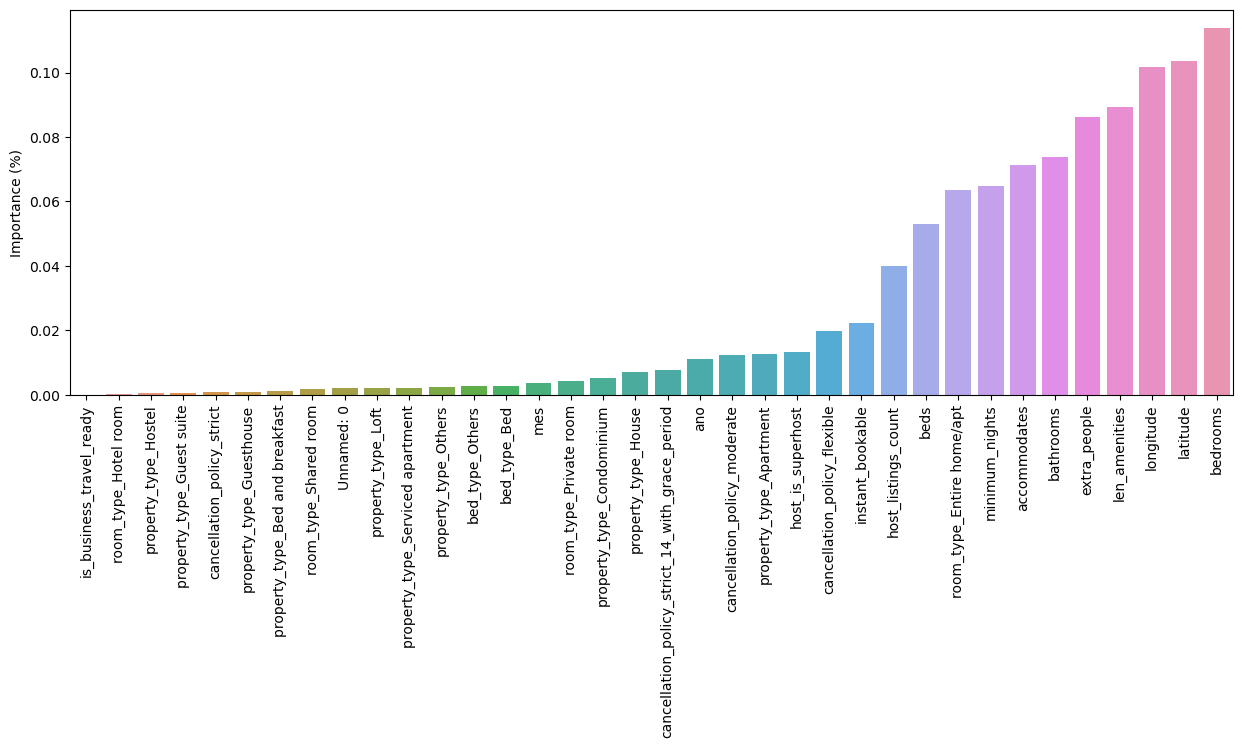

In [52]:
importance_df = pd.DataFrame(model_et.feature_importances_, x_train.columns)
importance_df = importance_df.rename(columns={0: 'Importance (%)'})
importance_df = importance_df.sort_values(by='Importance (%)', ascending=True)
display (importance_df)

plt.figure(figsize=(15,5))
graph = sns.barplot(x= importance_df.index, y=importance_df['Importance (%)'])

graph.tick_params(axis='x', rotation=90)



I'll delete columns that doesn't significantly affect my prediction, in order to simplificate our model.

ExtraTrees Model: 
R²: 97.41%
RSME: 42.71

Duration:00:04:01

In [53]:
filterd_importance = importance_df[importance_df['Importance (%)'] < 0.0021]
columns_toDel = list(filterd_importance.index)

print(df.columns)

for column in columns_toDel:
    df = df.drop(column, axis=1)

print(df.columns)



Index(['Unnamed: 0', 'host_is_superhost', 'host_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'extra_people', 'minimum_nights', 'instant_bookable',
       'is_business_travel_ready', 'ano', 'mes', 'len_amenities',
       'property_type_Apartment', 'property_type_Bed and breakfast',
       'property_type_Condominium', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Loft', 'property_type_Others',
       'property_type_Serviced apartment', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Bed', 'bed_type_Others',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')
Index(['host_is_superhost', 'host_listings_count', 'latitude', '

In [55]:
y= df['price']
x= df.drop('price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10) #random state just to fix the "randomic split")

st = time.time()

#train
model_et.fit(x_train, y_train)
#test
prediction = model_et.predict(x_test)
test_model("ExtraTrees", y_test, prediction)

ft = time.time()
dt = ft - st
dt = time.strftime("%H:%M:%S", time.gmtime(dt))
print(f'Duration:{dt}\n')

c:\Users\bejr2\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\bejr2\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


ExtraTrees Model: 
R²: 97.51%
RSME: 41.85

Duration:00:03:11



### EXPORTING THE FINAL RESULT 

In [57]:
df.to_csv('FinalDF_2.csv')
import joblib

joblib.dump(model_et, "FinalModel.joblib")

['FinalModel.joblib']